In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bumba5341/advertisingcsv")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/bumba5341/advertisingcsv/versions/1


In [ ]:
import os
import pandas as pd
import numpy as np

os.listdir(path)

['Advertising.csv']

In [ ]:
df = pd.read_csv(os.path.join(path, "Advertising.csv"))
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.set_index("Unnamed: 0")
df.rename(columns={"Unnamed: 0": "index"}, inplace=True)
df.head()

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,index,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

,0
index,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']].values
y = df['Sales'].values

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [ ]:
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(X_scaled.shape[1], X_scaled.shape[2])))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1660
Epoch 2/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0098
Epoch 3/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0061
Epoch 4/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0032
Epoch 5/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0025
Epoch 6/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 7/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0027
Epoch 8/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0016
Epoch 9/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015
Epoch 10/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0013
Epoch 11/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0011
Epoch 12/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0793e-04
Epoch 13/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9285e-04
Epoch 14/100
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0012
Epoch 15/100
160/160 ━━━━━━━━━━━━━━

In [ ]:
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [ ]:
y_pred_rescaled = scaler.inverse_transform(y_pred)
y_test_rescaled = scaler.inverse_transform(y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)

In [ ]:
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 0.4740743243694306
Mean Squared Error (MSE): 0.4226106338045298


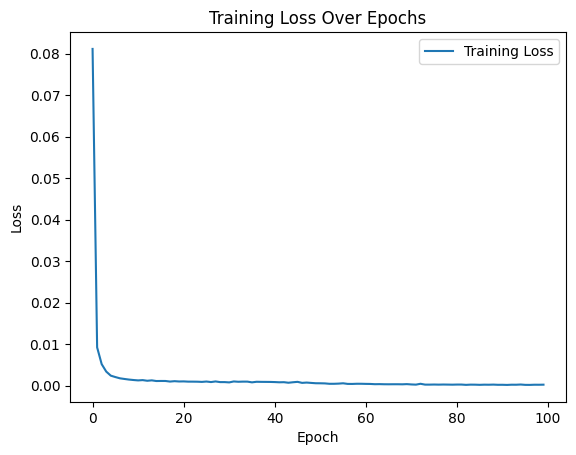

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss Over Epochs')
plt.show()

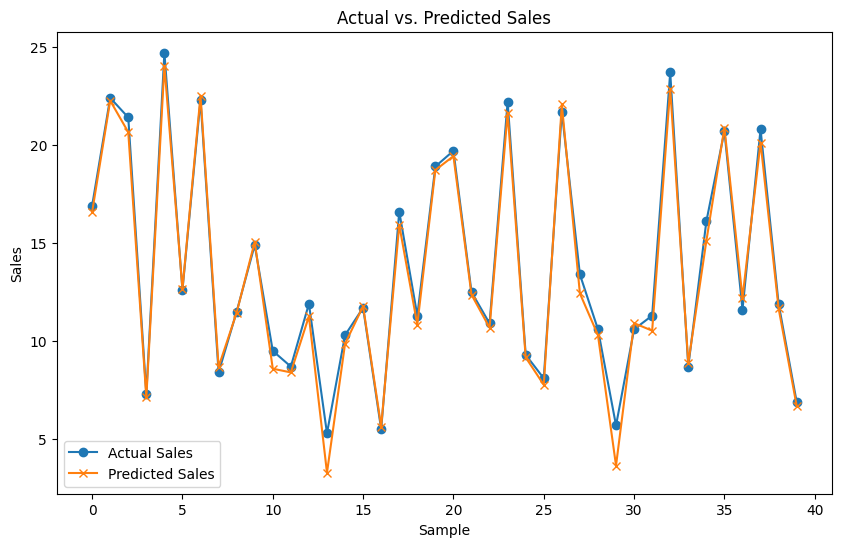

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='Actual Sales', marker='o')
plt.plot(y_pred_rescaled, label='Predicted Sales', marker='x')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs. Predicted Sales')
plt.show()